<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/Diracturing/Lab_4/Diracturing_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: **
**Julius Andersson**

# **Abstract**
In this lab an algorithm was constructed to approximate functions. To be more specific the algorithm is based on the L2 projection to point wise linear approximation over a mesh in 1D. Furthermore the accuracy and the convergence rate was tested.  

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [2]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [75]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import scipy.integrate as integrate
import math

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
There exist many different methods to approximate functions. Here we focus on the projection method. We can approximate a function by projecting it into a finite dimensional subspace. We are interested in the Hilbert space $L^2([a,b])$ with the inner product, $(f,g)=\int_{a}^{b} f(x)g(x) \,dx$. In this lab the subspace is the space of continious piecewise linear polynomials. Equation 9.12 can be restated as $\sum_{j=1}^{N}\alpha_j(\phi_j,\phi_i)=(f,\phi_i), \forall i=1,...,N.$ This correspond to the matrix equation A$\alpha$=b. By calculating A and b we can solve for $\alpha$. We then have our approximation $P_Nf(x)=\sum_{j=1}^{N}\alpha_j\phi_j(x)$.

# **Method**
The algorithm is based on algorithm 9.2 in the lecture notes. 

In [26]:
def getlocalshape(k,mesh):
  return 1

def integrate_vec(f,k,i,mesh):
  if i==0:
    g = lambda x: f(x)*(mesh[k+1]-x)/abs(mesh[k+1]-mesh[k])
  else:
    g = lambda x: f(x)*(x-mesh[k])/abs(mesh[k+1]-mesh[k]) 

  ans,err=integrate.quad(g,mesh[k],mesh[k+1])
  return ans

def integrate_mat(k,i,j,mesh):
  h=mesh[k+1]-mesh[k]
  if(i==j):
    return h/3
  else:
    return h/6


def assembly(f,mesh):
  globalb=np.zeros(len(mesh))
  globala=np.zeros((len(mesh),len(mesh)))

  for k in range(len(mesh)-1):
    b=np.zeros(2)
    a=np.zeros((2,2))
    q=getlocalshape(k,mesh)
    
    for i in range(q+1):
      b[i]=integrate_vec(f,k,i,mesh)
      for j in range(q+1):
        a[i,j]=integrate_mat(k,i,j,mesh)
    
    globalb[k]+=b[0]
    globalb[k+1]+=b[1]
    globala[k,k]+=a[0,0]
    globala[k+1,k+1]+=a[1,1]
    globala[k,k+1]+=a[0,1]
    globala[k+1,k]+=a[1,0]

  return globala,globalb


# **Results**
Two functions $x^2$ and $\frac{\sin(x)}{x}$ was tested. Both the accuracy and the convergence rate was tested.

nr of points:  3  error:  10.392304845413275
nr of points:  5  error:  3.3541019662496843
nr of points:  7  error:  1.763834207376393
nr of points:  9  error:  1.1250000000000009
nr of points:  11  error:  0.79598994968529
nr of points:  13  error:  0.6009252125773259
nr of points:  15  error:  0.4742428587192867
nr of points:  17  error:  0.3865411524016561
nr of points:  19  error:  0.32288140322524833
nr of points:  21  error:  0.27495454169734357
nr of points:  23  error:  0.23780982760227687
nr of points:  25  error:  0.20833333333331985
nr of points:  27  error:  0.18447878423810293
nr of points:  29  error:  0.16485198389187067
nr of points:  31  error:  0.14847371634213422
nr of points:  33  error:  0.13463818702823557
nr of points:  35  error:  0.12282518580828133
nr of points:  37  error:  0.1126437505610644
nr of points:  39  error:  0.10379498058279774
nr of points:  41  error:  0.09604686356151551


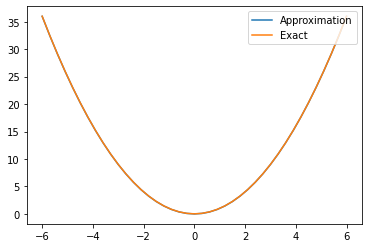

In [85]:
nrOfPoints=1
for i in range(20):
  nrOfPoints+=2

  f=lambda x: x**2
  x1 = np.linspace(-6,6,nrOfPoints)
  a,b=assembly(f,x1)
  alfa=np.linalg.solve(a,b)

  x2=np.linspace(-6,6,nrOfPoints)
  y2=[f(i) for i in x2]
  print("nr of points: ",nrOfPoints," error: ",np.linalg.norm(alfa-y2))

plt.plot(x1,alfa,label='Approximation')
plt.plot(x2,y2,label='Exact')
plt.legend(loc='upper right')

nr of points:  2  error:  0.7101441454403837
nr of points:  4  error:  0.3324941758698867
nr of points:  6  error:  0.17970631703708476
nr of points:  8  error:  0.21973265120016397
nr of points:  10  error:  0.16042001169942147
nr of points:  12  error:  0.11674861165542993
nr of points:  14  error:  0.08878284565547745
nr of points:  16  error:  0.07020875797647139
nr of points:  18  error:  0.05725278380820221
nr of points:  20  error:  0.0478239285517536
nr of points:  22  error:  0.040719676353097485
nr of points:  24  error:  0.035213135227318844
nr of points:  26  error:  0.030844092351198893
nr of points:  28  error:  0.02730921813719268
nr of points:  30  error:  0.02440157968655033
nr of points:  32  error:  0.021975775668391224
nr of points:  34  error:  0.019927004579584153
nr of points:  36  error:  0.018178037959837443
nr of points:  38  error:  0.01667085248811056
nr of points:  40  error:  0.015361102556236171


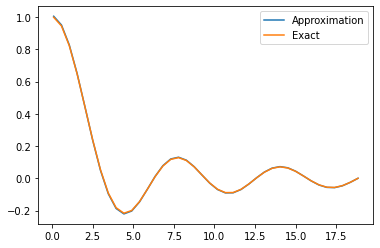

In [84]:
nrOfPoints=0
for i in range(20):
  nrOfPoints+=2

  f=lambda x: math.sin(x)/x
  x1 = np.linspace(0.1,6*np.pi,nrOfPoints)
  a,b=assembly(f,x1)
  alfa=np.linalg.solve(a,b)

  x2=np.linspace(0.1,6*np.pi,nrOfPoints)
  y2=[f(i) for i in x2]
  print("nr of points: ",nrOfPoints," error: ",np.linalg.norm(alfa-y2))

plt.plot(x1,alfa,label='Approximation')
plt.plot(x2,y2,label='Exact')
plt.legend(loc='upper right')

# **Discussion**
The algorithm could without too many points approximate the tested functions. In the first test we see a fast convergence. In the second test the error was already low at 2 points. The norm was used to estimate the error. It can be misguiding because in this case we are comparing vectors lenght of different dimensions. Neverless in this case it gives a rough estimate of how the errors converge. 

# **APPENDIX**